# Exploring Non-Linear Classification problems with Machine Learning and Deep Learning

This notebook will use the SciKit-Learn's *make_circles* function to create a 2 target value, concentric circle, dataset.  Concentric circles are clearly present a data set that cannot be linearly seperated.  Fortunately both Machine Learning and Deep Learning can be used with non-linear techniques.

In this notebook we will look at the following algorithms to see how they handle non-linear, concentric circle, 2-class classification.

> Logistic Regression

> Linear Support Vector Machine

> Polynomial Support Vector Machine

> Radial Bias Function Support Vector Machine

> Keras Neural Network



In [1]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC


from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
def plot_predictions(clf, axes, figsize=(10,8), X=None, y=None):
    """
    Plot predictions in the 'axes' space to visually see for every point what the 
    decision boundary looks like and how the probability varies
    axes[0] - X1 min
    axes[1] - X1 max
    axes[2] - X2 min
    axes[3] - X2 max
    """
    axes = np.array(axes)*1.2
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_ = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_).reshape(x0.shape)
    plt.figure(figsize=figsize)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    if type(clf) not in [RandomForestClassifier, Sequential]:
        y_decision = clf.decision_function(X_).reshape(x0.shape)
        plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    if X is not None and y is not None:
        plot_dataset(X,y,axes, None, 1)
        

In [93]:
def plot_dataset(X, y, axes, figsize=(10,8), expand_plot_percent=1.2):
    """
    Plot the actual data points
    axes[0] - X1 min
    axes[1] - X1 max
    axes[2] - X2 min
    axes[3] - X2 max
    """
    if figsize is not None:
        plt.figure(figsize=figsize)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(np.array(axes)*expand_plot_percent)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)



Create the dataset using the *make_circles* [function from Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html).

Factor - scale factor between the inner circle and the outer circle. 

Noise - Standard deviation of Gaussian noise added to the data.

In [4]:
X, y = make_circles(n_samples=2000, factor=0.6, noise=0.1)

In [5]:
X.shape

(2000, 2)

In [6]:
y.shape

(2000,)

Get the minimum and maximum values to help determine the plotting boundaries.  The make_circles function returns a scaled dataset with a zero mean.

In [7]:
min_x0 = np.min(X[:,0])
max_x0 = np.max(X[:, 0])
print(min_x0)
print(max_x0)

-1.2236923528909749
1.2140761689139394


In [8]:
min_x1 = np.min(X[:, 1])
max_x1 = np.max(X[:, 1])

print(min_x1)
print(max_x1)

-1.2584997890830305
1.1513225810648966


In [9]:
axes = [min_x0, max_x0, min_x1, max_x1]

In [10]:
np.mean(X)

-0.0018597223277317075

In [11]:
X

array([[ 0.61616242,  0.06955734],
       [-0.32594199,  0.93807385],
       [-0.9430395 , -0.55164088],
       ...,
       [ 0.51357166, -0.39676017],
       [ 0.43684975, -0.86336472],
       [-0.11307411,  0.53457189]])

In [12]:
y[0:40]

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

Review the raw dataset.  There are 2 classes.  The outside circle of blue squares and the inner circle of green triangles.

Our goal is to create models that seperate the dataset so predictions can be made. 

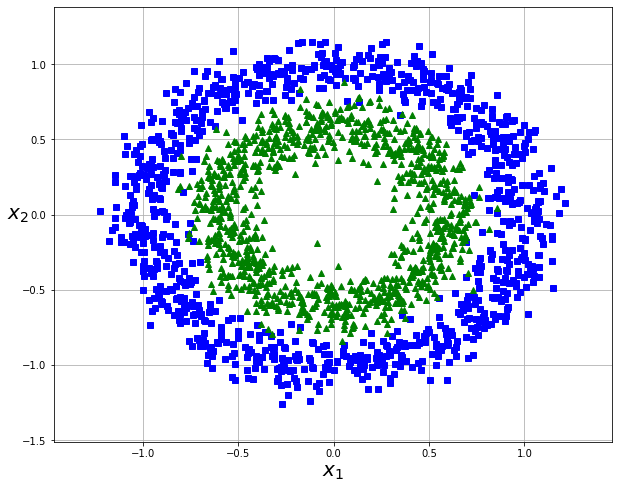

In [13]:
plot_dataset(X, y, axes)

Clearly there is no way a linear model can separate the two values ( red, blue ) - but we are going to try so we can see what happens.

Create a holdout dataset of 10% of the data and a test dataset that is 25% of the remaining 90% of the dataset.



In [14]:
X, X_holdout, y, y_holdout = train_test_split(X,y,test_size=0.1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25)

## Linear Model - Logistic Regression

Try a linear model on non-linear dataset.  

We would not expect this to perform well because we know the data is non-linear.  However in many cases we are only given the dataset and without further analysis we would not immediately know it is non-linear.  

A reasonable initial exploratory analysis would be to apply linear models to the data.

In [15]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')

logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
logreg.coef_

array([[ 0.01339513, -0.10910694]])

In [17]:
logreg.intercept_

array([-0.00997364])

In [18]:
logreg.score(X_test, y_test)

0.47555555555555556

In [19]:
logreg.score(X_holdout, y_holdout)

0.445

In [20]:
logreg_preds = logreg.predict(X_holdout)

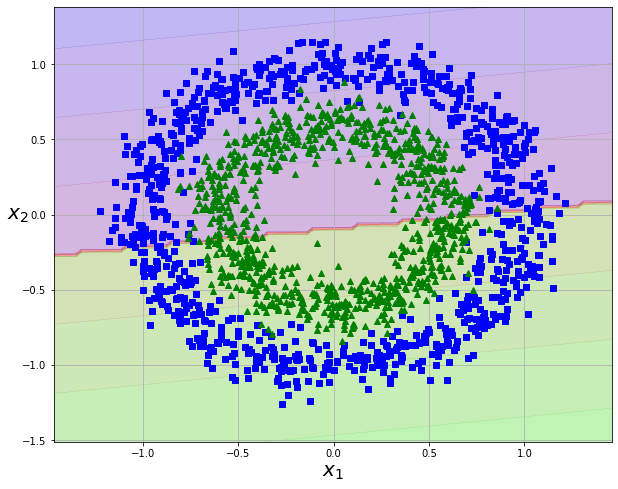

In [21]:
plot_predictions(logreg, axes, X=X, y=y)
plt.show()

In [22]:
logreg.score(X_holdout, y_holdout)

0.445

Because we have insight into the data, this result is reasonable.  Because we can only seperate with a line - we will be wrong 50% of the time.  

## LinearSVM

Not that I have any hope for any linear model, but we are going to start with a LinearSVC ( linear support vector classifier ) and then see how to adjust the Support Vector Machine to handle non-linear data

In [23]:
from sklearn.svm import LinearSVC

In [24]:
lin_svc = LinearSVC(C=1, loss='hinge')

In [25]:
lin_svc.fit(X_train, y_train)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [26]:
lin_svc.score(X_holdout, y_holdout)

0.475

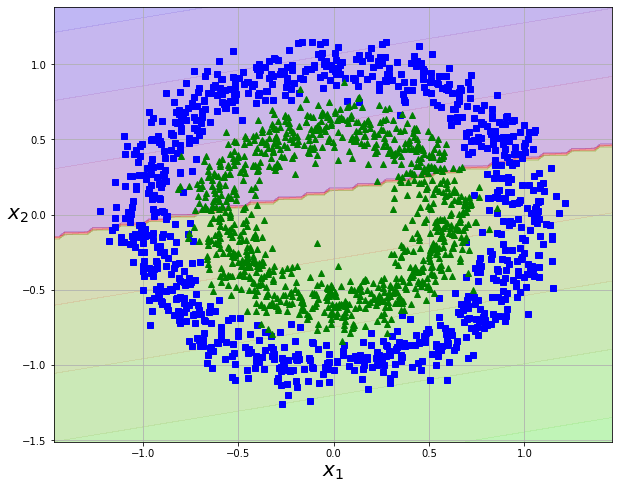

In [27]:
plot_predictions(lin_svc, axes, X=X, y=y)
plt.show()

Just like LogisticRegression, any linear model will fail to seperate these data points

## Ploynomial SVC Kernel

The Support Vector Classifier has the ability to specify different kernels.  You will hear this known as 'the kernel trick'.

What the kernel is doing is adding higher order dimensional features without actually adding them to the dataset.

The degree hyperparameter can be adjusted and if you find you are overfitting reduce the degree parameter. If you find the performance is underfitting, increase the degree parameter

In [28]:
from sklearn.svm import SVC

Scikit-Learns Support Vector Classifier

> C Regularization parameter.  The strength of the regularization is INVERSELY proportional to C.  The regularization is a squared l2 and C must be positive.

> coef0:  Only valid when the kernel is 'poly' or 'sigmoid'.  It is the independent term in kernel function.  Controls how much of the model is influenced by high degree polynomials vs low degree polynomials.

> degree:  Degree of the polynomial kernal function.  Only valid for 'poly' kernel.



In [29]:
poly_svc = SVC(kernel="poly", degree=3, coef0=1, C=5)

In [30]:
poly_svc.fit(X_train, y_train)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
poly_svc.score(X_holdout, y_holdout)

0.99

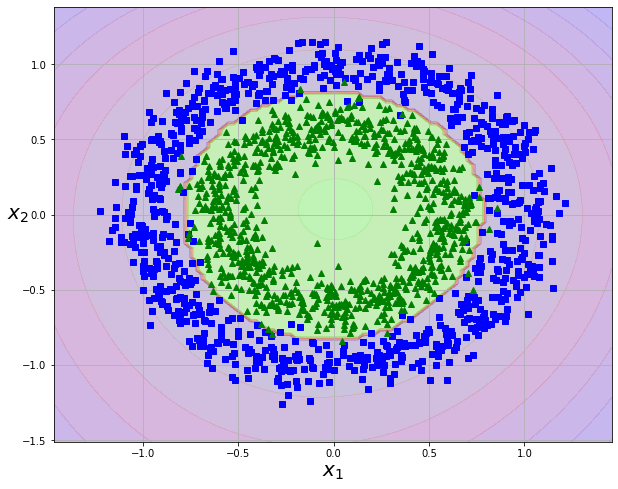

In [32]:
plot_predictions(poly_svc, axes, X=X, y=y)
plt.show()

With the hyperparameters empirically arrived at we can see this model is doing a very good job of seperating the dataset.  

The holdout dataset accuracy of 99% and we can see the decision boundary looks to generalize very well.

## Gaussian RBF Kernel

Lets look at another kernel - the 'radial basis function' kernel.

gamma below acts as a regularization parameter.  See the calculation below for the calculation when the value of gamma is 'scale'.

0.995
gamma: 1.4466604295737617


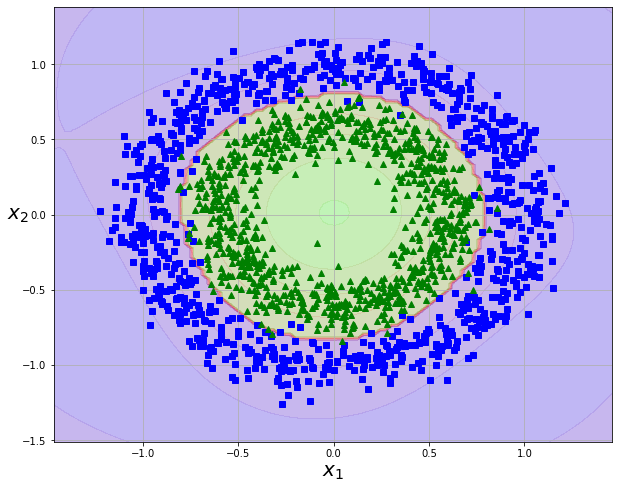

In [63]:
rbf_svc = SVC(kernel="rbf", gamma='scale', C=10)
rbf_svc.fit(X_train, y_train)
score = rbf_svc.score(X_holdout, y_holdout)
print(score)
print(f"gamma: {1/(X.shape[1]*X.var())}")
plot_predictions(rbf_svc, axes, X=X, y=y)
plt.show()

## Non-Linear Random Forest Decision Tree

Lets see how a non-linear Machine Learning Decision Tree would perform against this dataset.

Try changing the max_depth parameter and you see the model going from underfitting (2) to overfitting (10).

In [123]:
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier(n_estimators=100, max_depth=5)
random_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [124]:
random_clf.score(X_test, y_test)

0.96

In [125]:
random_clf.score(X_holdout, y_holdout)

0.935

The RandomForestClassifier does much better with a 90+% accuracy. (Since we did not include any random state values the actual performance will be depend upon the train_test_split.)  We can see how this classifier will do on the holdout dataset.

In [126]:
y_random_pred = random_clf.predict(X_holdout)

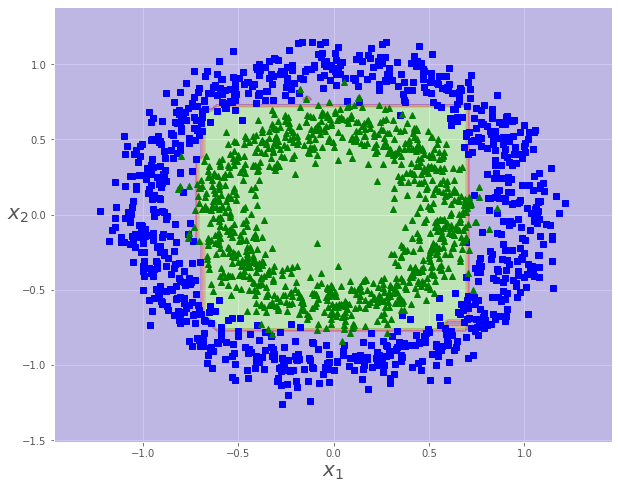

In [127]:
plot_predictions(random_clf, axes, X=X, y=y)
plt.show()

We can see that even though the RandomForestClassifier is able to handle the non-linear concentric circles it does not perform as well as the Support Vector Machines using kernels.

## DeepLearning Model

Lets see if we can train a Deep Neural Network to seperate the circle datasets with better accuracy that the RandomForestClassifier.

This neural network will only have the input layer and 2 hidden 8-node layers followed by the output layer.

In [78]:
def build_model():
    model = Sequential()
    model.add(Dense(8, input_shape=(2,), activation="relu"))
    model.add(Dense(8, activation="relu"))

    model.add(Dense(1, activation="sigmoid"))
    sgd = SGD(0.01)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

    return model

In [79]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


Train the model with 50 Epochs.  We will see that this is not enough

In [80]:
num_epochs = 50
H = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=num_epochs, batch_size=64)


Train on 1350 samples, validate on 450 samples
Epoch 1/50
1350/1350 [==============================] - 0s 285us/sample - loss: 0.6917 - accuracy: 0.5074 - val_loss: 0.6911 - val_accuracy: 0.5244
Epoch 2/50
1350/1350 [==============================] - 0s 21us/sample - loss: 0.6910 - accuracy: 0.5081 - val_loss: 0.6906 - val_accuracy: 0.5222
Epoch 3/50
1350/1350 [==============================] - 0s 22us/sample - loss: 0.6903 - accuracy: 0.5074 - val_loss: 0.6901 - val_accuracy: 0.5244
Epoch 4/50
1350/1350 [==============================] - 0s 22us/sample - loss: 0.6896 - accuracy: 0.4956 - val_loss: 0.6896 - val_accuracy: 0.5333
Epoch 5/50
1350/1350 [==============================] - 0s 22us/sample - loss: 0.6889 - accuracy: 0.5126 - val_loss: 0.6891 - val_accuracy: 0.5289
Epoch 6/50
1350/1350 [==============================] - 0s 22us/sample - loss: 0.6883 - accuracy: 0.5141 - val_loss: 0.6886 - val_accuracy: 0.5333
Epoch 7/50
1350/1350 [==============================] - 0s 21us/sample

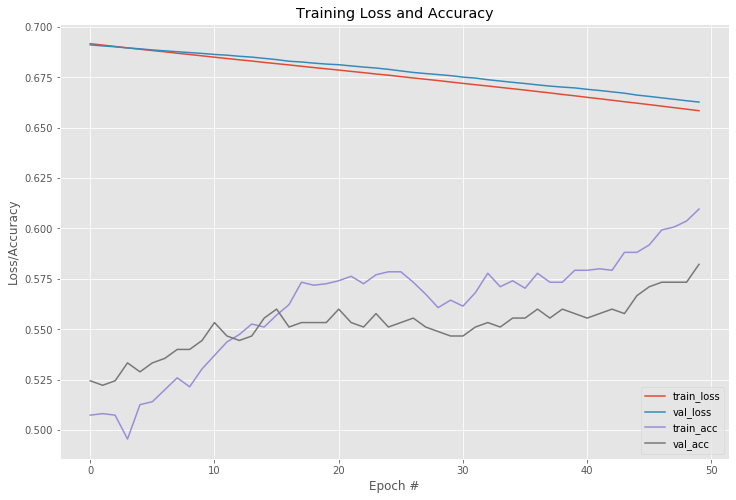

In [81]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, num_epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, num_epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [82]:
model_eval = model.evaluate(X_holdout, y_holdout, verbose=0)
list(zip(model.metrics_names, model_eval))

[('loss', 0.6634682512283325), ('accuracy', 0.57)]

Clearly 50 Epochs is not enough.  The Loss/Accuracy curves show that the model has not converged, and the accuracy is only 70%.

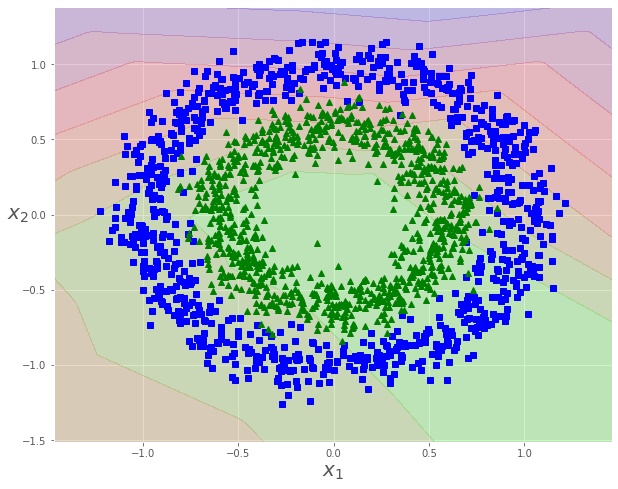

In [85]:
plot_predictions(model, axes, X=X, y=y)
plt.show()

In [86]:
# holdout test
y_pred = model.predict(X_holdout)
y_pred = [1 if x[0] > 0.5 else 0 for x in y_pred]

Increase the number of Epochs to 600 and view the Loss/Accuracy.

In [88]:
num_epochs = 600
H = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=num_epochs, batch_size=64)


Train on 1350 samples, validate on 450 samples
Epoch 1/600
1350/1350 [==============================] - 0s 25us/sample - loss: 0.6576 - accuracy: 0.6133 - val_loss: 0.6618 - val_accuracy: 0.5956
Epoch 2/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.6568 - accuracy: 0.6252 - val_loss: 0.6613 - val_accuracy: 0.6044
Epoch 3/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.6560 - accuracy: 0.6326 - val_loss: 0.6605 - val_accuracy: 0.6044
Epoch 4/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.6551 - accuracy: 0.6407 - val_loss: 0.6597 - val_accuracy: 0.6111
Epoch 5/600
1350/1350 [==============================] - 0s 22us/sample - loss: 0.6543 - accuracy: 0.6452 - val_loss: 0.6591 - val_accuracy: 0.6133
Epoch 6/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.6534 - accuracy: 0.6474 - val_loss: 0.6583 - val_accuracy: 0.6222
Epoch 7/600
1350/1350 [==============================] - 0s 21us/

Epoch 56/600
1350/1350 [==============================] - 0s 22us/sample - loss: 0.5856 - accuracy: 0.7963 - val_loss: 0.5915 - val_accuracy: 0.7800
Epoch 57/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.5837 - accuracy: 0.8096 - val_loss: 0.5897 - val_accuracy: 0.7800
Epoch 58/600
1350/1350 [==============================] - 0s 22us/sample - loss: 0.5815 - accuracy: 0.8148 - val_loss: 0.5877 - val_accuracy: 0.7822
Epoch 59/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.5795 - accuracy: 0.8133 - val_loss: 0.5856 - val_accuracy: 0.7822
Epoch 60/600
1350/1350 [==============================] - 0s 20us/sample - loss: 0.5774 - accuracy: 0.8170 - val_loss: 0.5835 - val_accuracy: 0.7800
Epoch 61/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.5752 - accuracy: 0.8141 - val_loss: 0.5813 - val_accuracy: 0.7822
Epoch 62/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.5730 - accuracy: 0.8215

1350/1350 [==============================] - 0s 23us/sample - loss: 0.4329 - accuracy: 0.9222 - val_loss: 0.4389 - val_accuracy: 0.9111
Epoch 111/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.4296 - accuracy: 0.9215 - val_loss: 0.4352 - val_accuracy: 0.9156
Epoch 112/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.4264 - accuracy: 0.9237 - val_loss: 0.4313 - val_accuracy: 0.9178
Epoch 113/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.4230 - accuracy: 0.9259 - val_loss: 0.4282 - val_accuracy: 0.9222
Epoch 114/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.4198 - accuracy: 0.9259 - val_loss: 0.4248 - val_accuracy: 0.9222
Epoch 115/600
1350/1350 [==============================] - 0s 22us/sample - loss: 0.4165 - accuracy: 0.9289 - val_loss: 0.4218 - val_accuracy: 0.9244
Epoch 116/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.4132 - accuracy: 0.9311 - val_

1350/1350 [==============================] - 0s 21us/sample - loss: 0.2718 - accuracy: 0.9570 - val_loss: 0.2736 - val_accuracy: 0.9667
Epoch 165/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.2696 - accuracy: 0.9585 - val_loss: 0.2710 - val_accuracy: 0.9689
Epoch 166/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.2671 - accuracy: 0.9593 - val_loss: 0.2683 - val_accuracy: 0.9667
Epoch 167/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.2647 - accuracy: 0.9600 - val_loss: 0.2661 - val_accuracy: 0.9667
Epoch 168/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.2623 - accuracy: 0.9600 - val_loss: 0.2638 - val_accuracy: 0.9667
Epoch 169/600
1350/1350 [==============================] - 0s 22us/sample - loss: 0.2600 - accuracy: 0.9607 - val_loss: 0.2618 - val_accuracy: 0.9689
Epoch 170/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.2579 - accuracy: 0.9615 - val_

Epoch 219/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.1702 - accuracy: 0.9726 - val_loss: 0.1706 - val_accuracy: 0.9822
Epoch 220/600
1350/1350 [==============================] - 0s 22us/sample - loss: 0.1688 - accuracy: 0.9719 - val_loss: 0.1688 - val_accuracy: 0.9822
Epoch 221/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.1671 - accuracy: 0.9733 - val_loss: 0.1672 - val_accuracy: 0.9822
Epoch 222/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.1657 - accuracy: 0.9741 - val_loss: 0.1663 - val_accuracy: 0.9800
Epoch 223/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.1644 - accuracy: 0.9726 - val_loss: 0.1649 - val_accuracy: 0.9822
Epoch 224/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.1632 - accuracy: 0.9726 - val_loss: 0.1634 - val_accuracy: 0.9822
Epoch 225/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.1618 - accuracy:

1350/1350 [==============================] - 0s 22us/sample - loss: 0.1182 - accuracy: 0.9763 - val_loss: 0.1196 - val_accuracy: 0.9756
Epoch 274/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.1175 - accuracy: 0.9770 - val_loss: 0.1183 - val_accuracy: 0.9800
Epoch 275/600
1350/1350 [==============================] - 0s 22us/sample - loss: 0.1166 - accuracy: 0.9741 - val_loss: 0.1180 - val_accuracy: 0.9778
Epoch 276/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.1160 - accuracy: 0.9756 - val_loss: 0.1175 - val_accuracy: 0.9778
Epoch 277/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.1154 - accuracy: 0.9748 - val_loss: 0.1171 - val_accuracy: 0.9778
Epoch 278/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.1147 - accuracy: 0.9748 - val_loss: 0.1169 - val_accuracy: 0.9778
Epoch 279/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.1142 - accuracy: 0.9756 - val_

1350/1350 [==============================] - 0s 21us/sample - loss: 0.0921 - accuracy: 0.9770 - val_loss: 0.0966 - val_accuracy: 0.9778
Epoch 328/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.0917 - accuracy: 0.9763 - val_loss: 0.0963 - val_accuracy: 0.9756
Epoch 329/600
1350/1350 [==============================] - 0s 22us/sample - loss: 0.0914 - accuracy: 0.9763 - val_loss: 0.0965 - val_accuracy: 0.9778
Epoch 330/600
1350/1350 [==============================] - 0s 26us/sample - loss: 0.0910 - accuracy: 0.9778 - val_loss: 0.0956 - val_accuracy: 0.9778
Epoch 331/600
1350/1350 [==============================] - 0s 22us/sample - loss: 0.0907 - accuracy: 0.9770 - val_loss: 0.0955 - val_accuracy: 0.9778
Epoch 332/600
1350/1350 [==============================] - 0s 20us/sample - loss: 0.0904 - accuracy: 0.9770 - val_loss: 0.0948 - val_accuracy: 0.9778
Epoch 333/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.0901 - accuracy: 0.9763 - val_

1350/1350 [==============================] - 0s 21us/sample - loss: 0.0785 - accuracy: 0.9785 - val_loss: 0.0845 - val_accuracy: 0.9778
Epoch 382/600
1350/1350 [==============================] - 0s 22us/sample - loss: 0.0783 - accuracy: 0.9785 - val_loss: 0.0846 - val_accuracy: 0.9756
Epoch 383/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.0782 - accuracy: 0.9785 - val_loss: 0.0843 - val_accuracy: 0.9778
Epoch 384/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.0780 - accuracy: 0.9770 - val_loss: 0.0836 - val_accuracy: 0.9800
Epoch 385/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.0778 - accuracy: 0.9763 - val_loss: 0.0836 - val_accuracy: 0.9800
Epoch 386/600
1350/1350 [==============================] - 0s 22us/sample - loss: 0.0777 - accuracy: 0.9785 - val_loss: 0.0838 - val_accuracy: 0.9778
Epoch 387/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.0774 - accuracy: 0.9778 - val_

Epoch 436/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.0703 - accuracy: 0.9778 - val_loss: 0.0773 - val_accuracy: 0.9800
Epoch 437/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.0702 - accuracy: 0.9785 - val_loss: 0.0774 - val_accuracy: 0.9800
Epoch 438/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.0702 - accuracy: 0.9785 - val_loss: 0.0770 - val_accuracy: 0.9800
Epoch 439/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.0700 - accuracy: 0.9785 - val_loss: 0.0768 - val_accuracy: 0.9778
Epoch 440/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.0698 - accuracy: 0.9785 - val_loss: 0.0765 - val_accuracy: 0.9778
Epoch 441/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.0696 - accuracy: 0.9785 - val_loss: 0.0762 - val_accuracy: 0.9778
Epoch 442/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.0695 - accuracy:

1350/1350 [==============================] - 0s 21us/sample - loss: 0.0653 - accuracy: 0.9793 - val_loss: 0.0722 - val_accuracy: 0.9800
Epoch 491/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.0655 - accuracy: 0.9778 - val_loss: 0.0720 - val_accuracy: 0.9778
Epoch 492/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.0651 - accuracy: 0.9785 - val_loss: 0.0726 - val_accuracy: 0.9800
Epoch 493/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.0652 - accuracy: 0.9785 - val_loss: 0.0724 - val_accuracy: 0.9800
Epoch 494/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.0648 - accuracy: 0.9793 - val_loss: 0.0722 - val_accuracy: 0.9800
Epoch 495/600
1350/1350 [==============================] - 0s 20us/sample - loss: 0.0646 - accuracy: 0.9793 - val_loss: 0.0723 - val_accuracy: 0.9800
Epoch 496/600
1350/1350 [==============================] - ETA: 0s - loss: 0.0480 - accuracy: 0.98 - 0s 21us/sampl

Epoch 544/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.0612 - accuracy: 0.9793 - val_loss: 0.0699 - val_accuracy: 0.9800
Epoch 545/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.0612 - accuracy: 0.9800 - val_loss: 0.0697 - val_accuracy: 0.9800
Epoch 546/600
1350/1350 [==============================] - 0s 24us/sample - loss: 0.0612 - accuracy: 0.9793 - val_loss: 0.0697 - val_accuracy: 0.9800
Epoch 547/600
1350/1350 [==============================] - 0s 24us/sample - loss: 0.0612 - accuracy: 0.9800 - val_loss: 0.0695 - val_accuracy: 0.9800
Epoch 548/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.0610 - accuracy: 0.9800 - val_loss: 0.0695 - val_accuracy: 0.9800
Epoch 549/600
1350/1350 [==============================] - 0s 24us/sample - loss: 0.0608 - accuracy: 0.9800 - val_loss: 0.0699 - val_accuracy: 0.9800
Epoch 550/600
1350/1350 [==============================] - 0s 22us/sample - loss: 0.0612 - accuracy:

1350/1350 [==============================] - 0s 21us/sample - loss: 0.0586 - accuracy: 0.9807 - val_loss: 0.0677 - val_accuracy: 0.9800
Epoch 599/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.0586 - accuracy: 0.9793 - val_loss: 0.0673 - val_accuracy: 0.9800
Epoch 600/600
1350/1350 [==============================] - 0s 21us/sample - loss: 0.0584 - accuracy: 0.9800 - val_loss: 0.0674 - val_accuracy: 0.9800


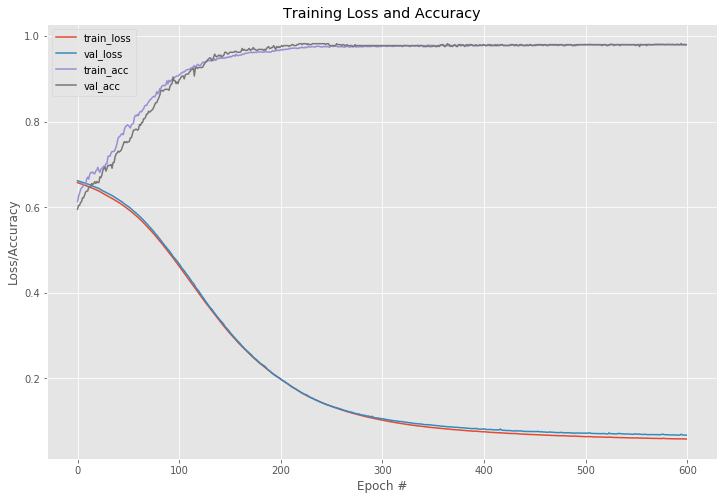

In [89]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, num_epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, num_epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [90]:
model_eval = model.evaluate(X_holdout, y_holdout, verbose=0)
list(zip(model.metrics_names, model_eval))

[('loss', 0.06513303428888322), ('accuracy', 0.98)]

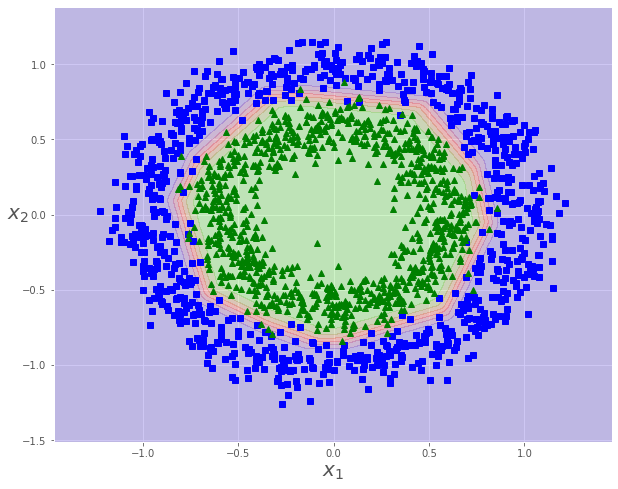

In [91]:
plot_predictions(model, axes, X=X, y=y)
plt.show()

With more training Epochs, we can see that the accuracy is greatly improved and the Loss/Accuracy curve is very good showing no signs of overfitting.

## Summary

In this notebook we looked a non-linear dataset ( concentric circles ) to see how different approaches performed.

LogisticRegression and LinearSVM only had an accuracy of 50%.  Which makes sense because there is no way to split the data with a line.

Support Vector Machines with kernels performed very well.  Using kernels allows a Support Vector Machine to translate the data to higher order dimensions which can make the data linearly seperable.

RandomForestClassifier also preformed well but as can be seen from the visualization it has a tough time around some of the boundaries.  Literally trying to fit a square peg into a round hole.

The simple 2 hidden layer Neural Network, with enough Epochs consistently performed very well in the 98%+ range.  

For non-linear problems you have to look to use non-linear classifiers. 